In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
happy=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
happy.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happy.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
happy.shape

(158, 12)

In [6]:
happy.describe()
#as there is large disfference in standard deviation the dataset is not normally distributed and skewness is present

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
happy.isnull().sum()
#no null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
happy.corr()["Happiness Score"].sort_values()
#the most important feature is Happiness rank,Dystopia,Freedom,least important is standard error and generosity


Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

In [37]:
#Drop least important feature Standard error and Generosity
newdf=happy.drop(["Standard Error","Generosity","Country","Region"],axis=1)

In [10]:
newdf.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')

In [11]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.5+ KB


In [12]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [13]:
import seaborn as sns

<AxesSubplot:>

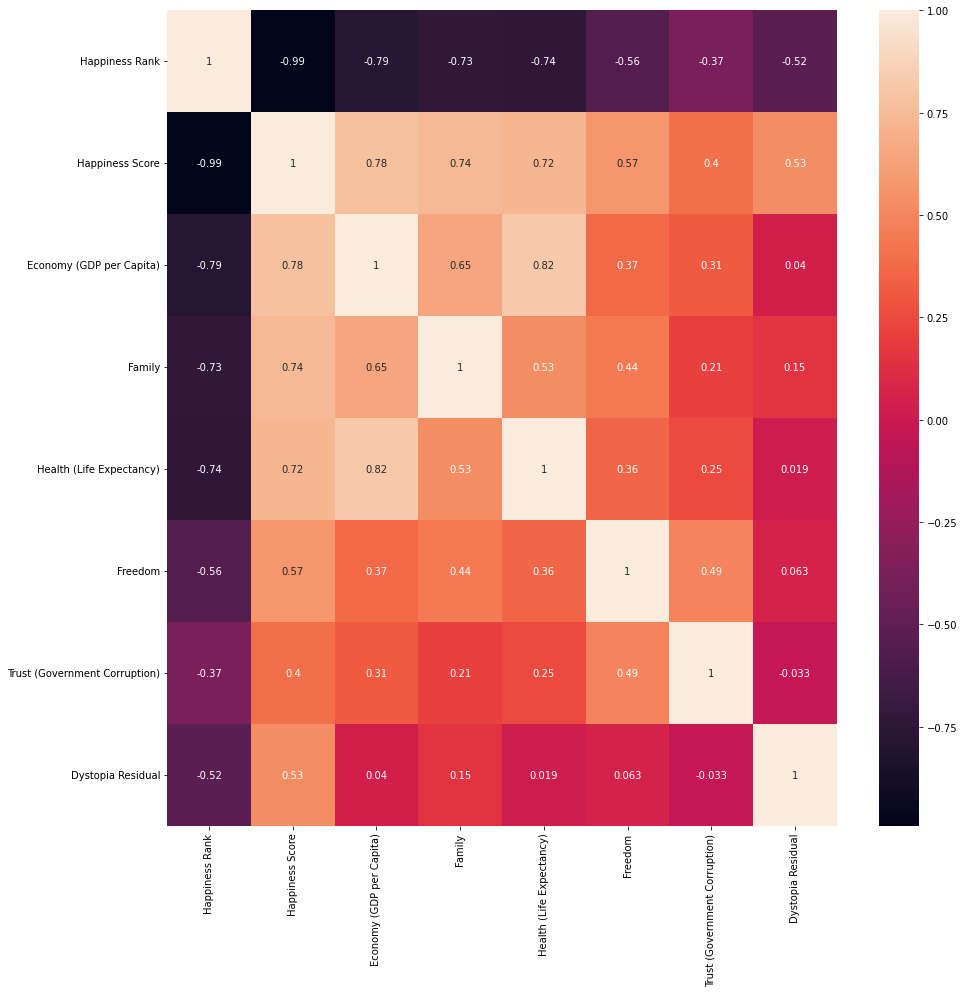

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(newdf.corr(),annot=True)

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

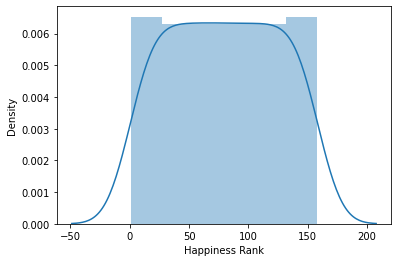

In [15]:
sns.distplot(newdf["Happiness Rank"])

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

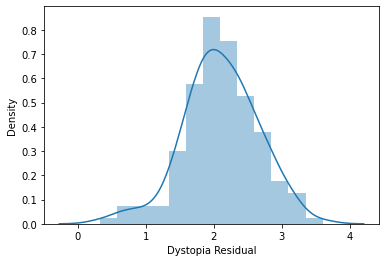

In [16]:
sns.distplot(newdf["Dystopia Residual"])

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

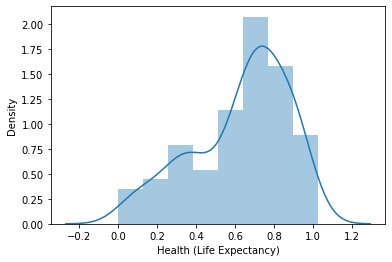

In [17]:

sns.distplot(newdf["Health (Life Expectancy)"])

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

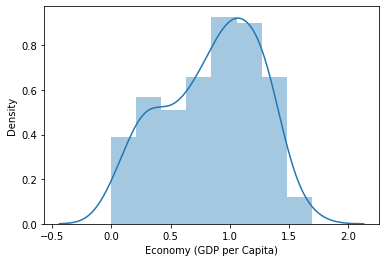

In [18]:
sns.distplot(newdf["Economy (GDP per Capita)"])

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Family', ylabel='Density'>

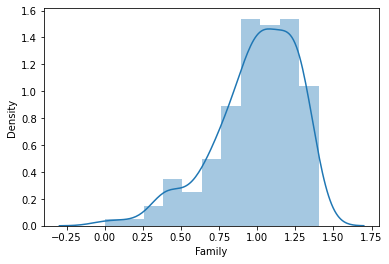

In [19]:
sns.distplot(newdf["Family"])

/home/revathy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dystopia Residual'>

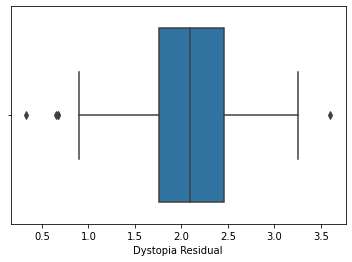

In [20]:
#conclusion data is not normally distributed but skewness is less
sns.boxplot(newdf["Dystopia Residual"])

/home/revathy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Economy (GDP per Capita)'>

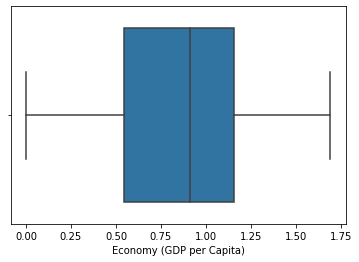

In [21]:
sns.boxplot(newdf["Economy (GDP per Capita)"])

/home/revathy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Health (Life Expectancy)'>

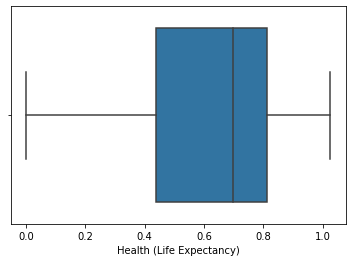

In [22]:
sns.boxplot(newdf["Health (Life Expectancy)"])

In [23]:
#outliers are not present in the dataset

In [30]:
#before applying machine learning we have to normalize the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [36]:
x=newdf.drop(columns="Happiness Score",axis=1)
x
y=newdf["Happiness Score"]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2400949836.py, line 1)

In [39]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [35]:
from sklearn.linear_model import LinearRegression()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score


In [55]:
scores=[] # We made list named as scores. 

for i in range(1000):

    x_train, x_test, y_train, y_test = train_test_split ( x, y, test_size=0.1, random_state=i) 

    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    
    scores.append(r2_score(y_pred,y_test))
    

    


In [57]:
scores

[0.9867052991384456,
 0.9881214495726172,
 0.9901858804725292,
 0.9804696447818675,
 0.9909182688581449,
 0.9831392067656822,
 0.9823078936103115,
 0.9798454778665384,
 0.9862763943149758,
 0.9898102563721114,
 0.984478640886252,
 0.9909687190206239,
 0.9868416479439404,
 0.9836755821535124,
 0.9853264855069165,
 0.979417644332466,
 0.9837793113898646,
 0.9946697891107652,
 0.9856426158286986,
 0.9872612544270238,
 0.9908870677904941,
 0.9829993452637041,
 0.9861435604988005,
 0.9897821082435441,
 0.9875777713853988,
 0.9791576585831929,
 0.9940762861745913,
 0.9866254632486486,
 0.9870943636835041,
 0.9757343838742355,
 0.9840971209320977,
 0.9904683655691559,
 0.9878176579012652,
 0.977984189001206,
 0.9808394526963872,
 0.9914488185219777,
 0.9877607871566274,
 0.9847152322873105,
 0.9842318600565756,
 0.9748155628776072,
 0.9849928475120165,
 0.989646394391768,
 0.984923185845108,
 0.9871534168432409,
 0.9827504187684433,
 0.9884802086751505,
 0.9856120688624025,
 0.985708545294911

In [61]:
np.argmax(scores)

485

In [62]:
scores[np.argmax(scores)]

0.996450240552978